# Lab 6: Clustering

In this assignment, we will learn two clustering methods: K-means and  Agglomerative method. 

Please first study the given example, which applies K-means and Agglomerative method to a toy dataset. 

Based on this example, your task is to apply K-means and Agglomerative method to the heart disease dataset. 


## 1. Example

### 1.1 Generate a toy dataset with two clusters

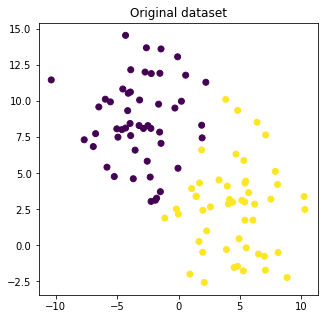

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets


# generate a toy dataset with two clusters
X, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=3.0, random_state=42)
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Original dataset')
plt.show()

### 1.2 Partition the dataset with K-means 

Here, we use K-means method to partition this toy dataset. Then, to evaluate the clustering performance, we use two methods. The first one is to visualize the partitioned dataset. 

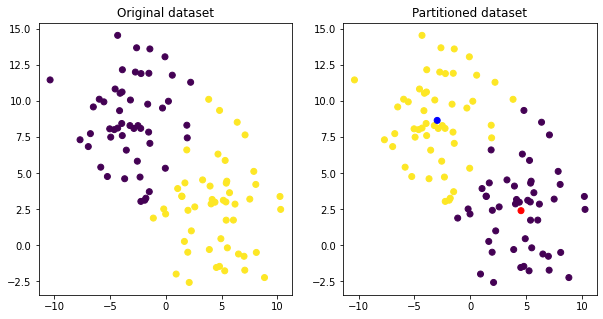

In [ ]:
cluster = KMeans(n_clusters=2, random_state=0).fit(X)

centroids = cluster.cluster_centers_  #get the clustering centroids

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Original dataset')

plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=cluster.labels_)
plt.scatter(centroids[:, 0], centroids[:, 1], c=['r', 'b'])  #visualize the clustering centroids
plt.title('Partitioned dataset')

plt.show()



The second method to evaluate the clustering performance is to use [normalized mutual information (NMI)](https://course.ccs.neu.edu/cs6140sp15/7_locality_cluster/Assignment-6/NMI.pdf)
The larger value indicates the better performance. 


In [ ]:
from sklearn.metrics.cluster import normalized_mutual_info_score

nmi = normalized_mutual_info_score(cluster.labels_, y, average_method='arithmetic')
print('The normalized mutual information score of the K-means method is {:.4f}'.format(nmi))

The normalized mutual information score of the K-means method is 0.9291


### 1.3 Partition the dataset with Agglomerative method

Then, we use the Agglomerative method to partition the toy dataset.

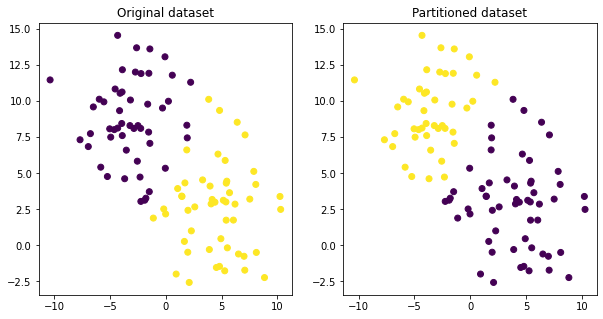

The normalized mutual information score of the Agglomerative method  is 0.6987


In [ ]:
cluster = AgglomerativeClustering(n_clusters=2).fit(X)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Original dataset')

plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=cluster.labels_)
plt.title('Partitioned dataset')

plt.show()

nmi = normalized_mutual_info_score(cluster.labels_, y, average_method='arithmetic')
print('The normalized mutual information score of the Agglomerative method  is {:.4f}'.format(nmi))

## 2. Task

In this task, we still use the [heart disease](./heart.csv) dataset in Lab Assignment 5. 
Each sample has the following feature: 

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


**The task is to partition all users into two groups with K-means and Agglomerative methods.**

In [ ]:
# importing the necessary modules
import pandas as pd                     # for the dataframe
import math                             # for ceiling function
import numpy as np                      # for linear algebra
import matplotlib.pyplot as plt         # for various plots

In [ ]:
# constants
DATASET_FILENAME = r'heart.csv'         # filename of the dataset input
MIN_SPARSE_P = 0.50                     # the minimum rate missing of a sparse feature
SEED = 42                               # randomizer for sampling, e.g., train, test data

In [ ]:
# load the heart disease dataset
df = pd.read_csv(DATASET_FILENAME)

# split X, y
label = df.columns[-1]                  # dataset label
y = df[label].values                    # label vector
Xdf = df.drop(label, axis=1)            # feature dataframe

# get the # samples and dimensionality (d) of Xdf
N_SAMPS, N_FEATS = Xdf.shape
print(r"# samples = {}".format(N_SAMPS))
print(r"# features = {}".format(N_FEATS))

# samples = 303
# features = 13


In [ ]:
# print some basic information about the dataset
print('\n===data frame information===')
df.info()

# print its parameters
print('\n===data frame parameters===')
df.describe()


===data frame information===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB

===data frame parameters===


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


From `df.info()`, we see that all of the features are numerical. Additionally, there are few examples $303 \leq 1000$. So we can inspect directly. Additionally, none are missing.

Our method of inspection will be visual through the scatterplot.
We will use the target as only categorical feature,
which would serve to color the scatterplot.

( 0, 1)( 2, 1)( 3, 1)( 4, 1)( 5, 1)( 6, 1)( 7, 1)( 8, 1)( 9, 1)(10, 1)(11, 1)(12, 1)
( 0,12)( 2,12)( 3,12)( 4,12)( 5,12)( 6,12)( 7,12)( 8,12)( 9,12)(10,12)(11,12)
( 0,11)( 2,11)( 3,11)( 4,11)( 5,11)( 6,11)( 7,11)( 8,11)( 9,11)(10,11)
( 0,10)( 2,10)( 3,10)( 4,10)( 5,10)( 6,10)( 7,10)( 8,10)( 9,10)
( 0, 9)( 2, 9)( 3, 9)( 4, 9)( 5, 9)( 6, 9)( 7, 9)( 8, 9)
( 0, 8)( 2, 8)( 3, 8)( 4, 8)( 5, 8)( 6, 8)( 7, 8)
( 0, 7)( 2, 7)( 3, 7)( 4, 7)( 5, 7)( 6, 7)
( 0, 6)( 2, 6)( 3, 6)( 4, 6)( 5, 6)
( 0, 5)( 2, 5)( 3, 5)( 4, 5)
( 0, 4)( 2, 4)( 3, 4)
( 0, 3)( 2, 3)
( 0, 2)


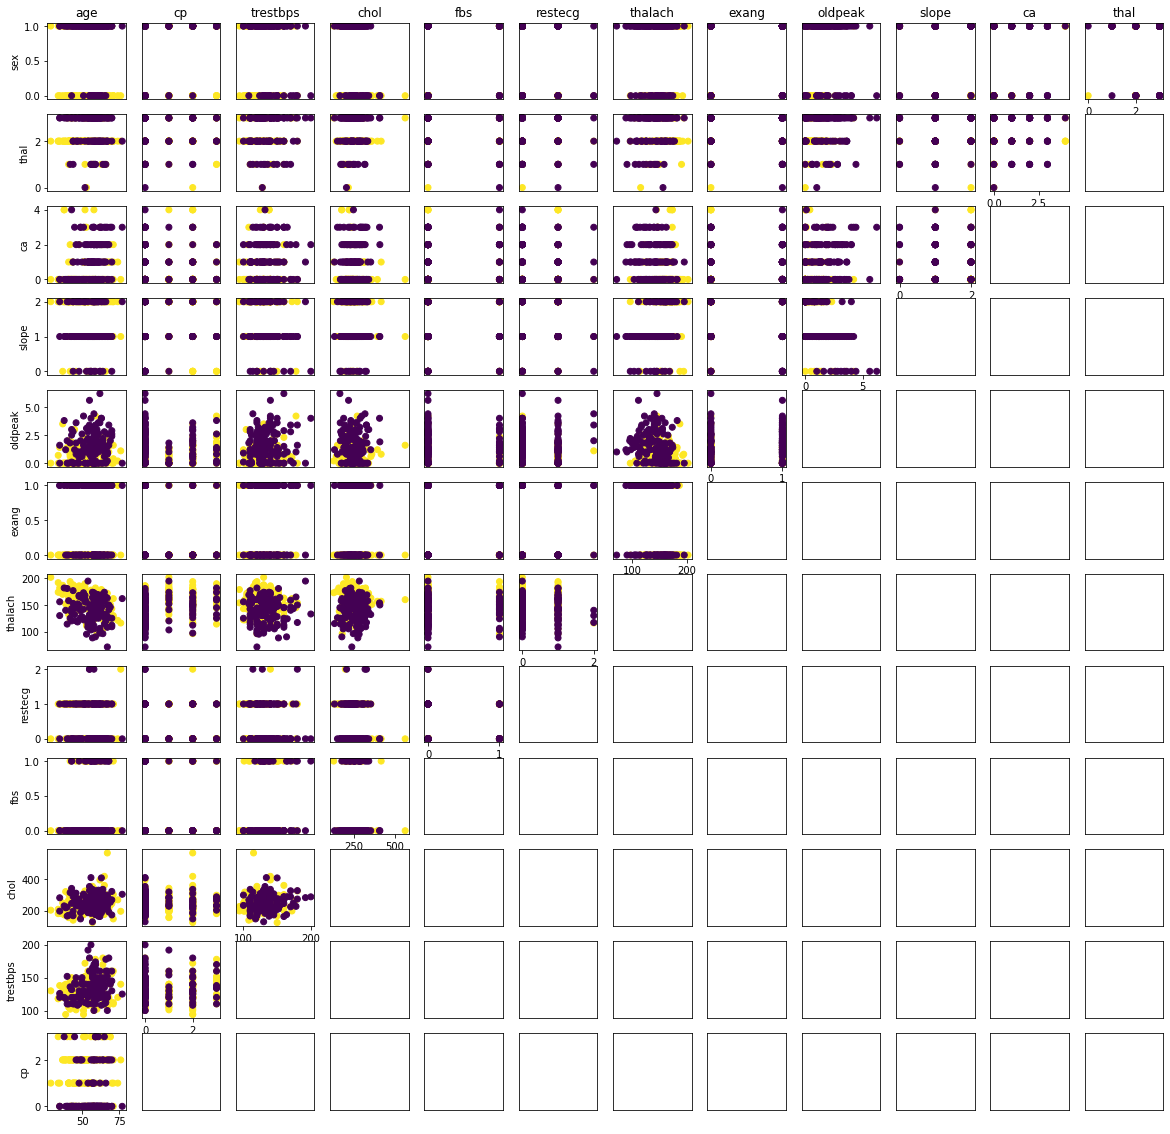

In [ ]:
def tablePlot(N_FEATS, Xdf, y):
    r'''
     Creates a scatter plot table of feature pairs from the given
     number of features from Xdf, using y for the plot color.

     @param N_FEATS : int = number of features to pair
     @param Xdf : pd.DataFrame = data frame from which to plot features
     @param y : nd.array = array of labels

     @return (fig, ax) tuple of the figure and axes containing the
     scatter plots
     '''
    # create square plot
    # we will avoid mapping a feature to itself
    fig, ax = plt.subplots(N_FEATS - 1, N_FEATS - 1, figsize=(20, 20))

    # clear axes
    for i_row in range(N_FEATS - 1):
        # for y for each column
        for i_col in range(N_FEATS - 1):
            ax[i_row][i_col].get_xaxis().set_visible(False)
            ax[i_row][i_col].get_yaxis().set_visible(False)
    # next i_col, i_row

    # for each row in [1, [d..2]]
    # (i_col, i_row) -> (X0, X1)
    for i_row, iX1 in enumerate([1] + list(range((N_FEATS - 1), 1, -1))):
        # get the X1 feature header
        X1 = Xdf[Xdf.columns[iX1]]
        # calculate the number of rows
        N_COLS = iX1 if (iX1 != 1) else N_FEATS
        # for each column [0, [2..N_COLS]]
        for i_col, iX0 in enumerate([0] + list(range(2, N_COLS))):
            # get the X0 feature header
            X0 = Xdf[Xdf.columns[iX0]]
            # print the X as a progress bar
            print('({:2},{:2})'.format(iX0, iX1), end='')
            # plot these two features
            ax[i_row][i_col].scatter(X0, X1, c=y)
        # next iX0
        # label row
        ax[i_row][0].get_yaxis().set_label_text(Xdf.columns[iX1])
        ax[i_row][0].get_yaxis().set_visible(True)
        print()
    # next iX1

    # for each column in [0, [2..N_FEATS]]
    for i_col, iX0 in enumerate([0] + list(range(2, N_FEATS))):
        # label column
        ax[0][i_col].set_title(Xdf.columns[iX0])
        # for the axis, use a backwards diagonal
        ax[-i_col - 1][i_col].get_xaxis().set_visible(True)
    # next iX0

    return fig, ax
# end def tablePlot(N_FEATS, Xdf, y)

# visualize the data
tablePlot(N_FEATS, Xdf, y)
plt.show()

### 2.1 Preprocess the raw data

* Check whether there are missing values
* Check whether theare are cateogrical features


Earlier we found that all features are numerical. Thus, there are no categorical features.

In [ ]:
# calculate the number of missing values
n_missing = df.isnull().sum()
# calculate the rate
p_missing = n_missing/df.shape[0]

print(r'===# missing values per column===')
print(n_missing)
print()
print(r'===# missing values per column===')
print(p_missing)

# remove any sparse features
df = df.drop(df.columns[p_missing > MIN_SPARSE_P], axis = 1)

===# missing values per column===
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

===# missing values per column===
age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64


There are no missing values this time.
Let's inspect the distributions of each feature and the label.


===histogram of age===
min	 29
25%	 47.5
75%	 61.0
iqr	 13.5
max	 77
range	 48
width	 4.019908994408628
# bins	 12


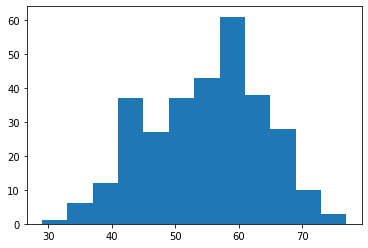


===histogram of sex===
min	 0
25%	 0.0
75%	 1.0
iqr	 1.0
max	 1
range	 1
width	 0.29777103662286136
# bins	 4


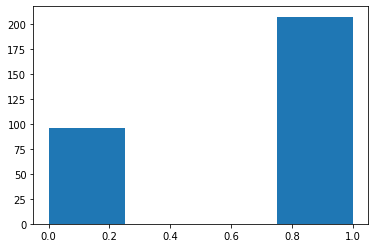


===histogram of cp===
min	 0
25%	 0.0
75%	 2.0
iqr	 2.0
max	 3
range	 3
width	 0.5955420732457227
# bins	 6


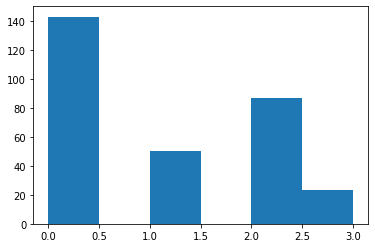


===histogram of trestbps===
min	 94
25%	 120.0
75%	 140.0
iqr	 20.0
max	 200
range	 106
width	 5.9554207324572275
# bins	 18


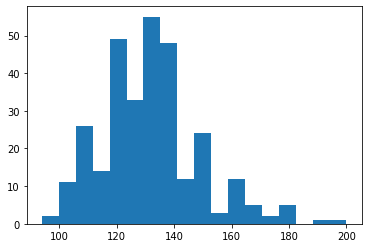


===histogram of chol===
min	 126
25%	 211.0
75%	 274.5
iqr	 63.5
max	 564
range	 438
width	 18.908460825551696
# bins	 24


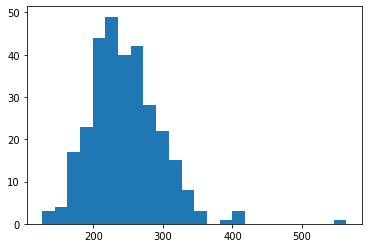


===histogram of fbs===
min	 0
25%	 0.0
75%	 0.0
iqr	 0.0
max	 1
range	 1
width	 0.5
# bins	 2


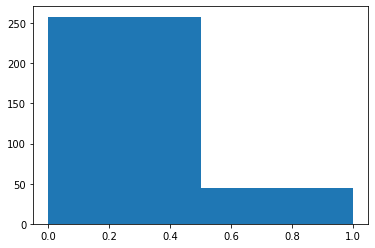


===histogram of restecg===
min	 0
25%	 0.0
75%	 1.0
iqr	 1.0
max	 2
range	 2
width	 0.29777103662286136
# bins	 7


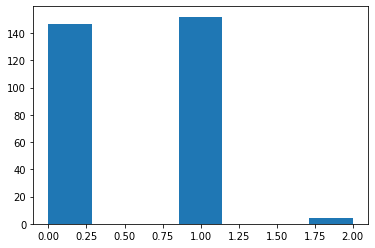


===histogram of thalach===
min	 71
25%	 133.5
75%	 166.0
iqr	 32.5
max	 202
range	 131
width	 9.677558690242995
# bins	 14


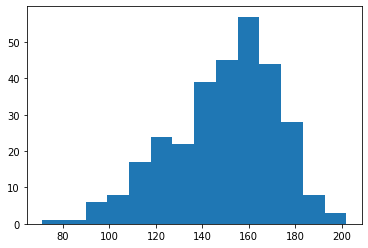


===histogram of exang===
min	 0
25%	 0.0
75%	 1.0
iqr	 1.0
max	 1
range	 1
width	 0.29777103662286136
# bins	 4


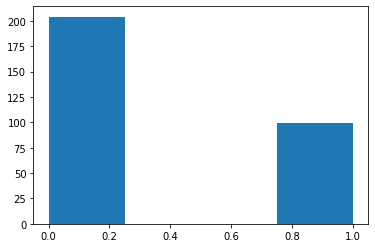


===histogram of oldpeak===
min	 0.0
25%	 0.0
75%	 1.6
iqr	 1.6
max	 6.2
range	 6.2
width	 0.4764336585965782
# bins	 14


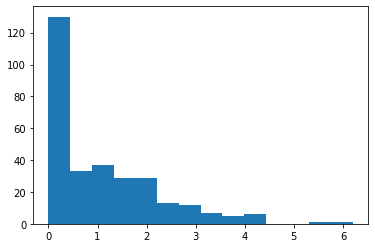


===histogram of slope===
min	 0
25%	 1.0
75%	 2.0
iqr	 1.0
max	 2
range	 2
width	 0.29777103662286136
# bins	 7


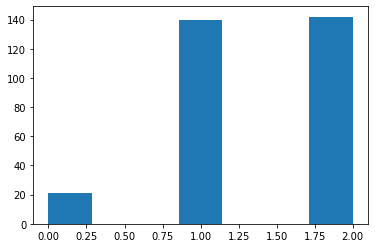


===histogram of ca===
min	 0
25%	 0.0
75%	 1.0
iqr	 1.0
max	 4
range	 4
width	 0.29777103662286136
# bins	 14


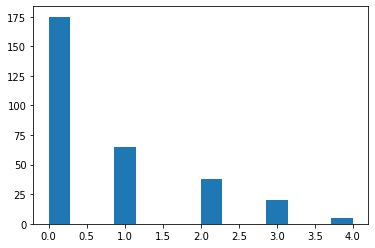


===histogram of thal===
min	 0
25%	 2.0
75%	 3.0
iqr	 1.0
max	 3
range	 3
width	 0.29777103662286136
# bins	 11


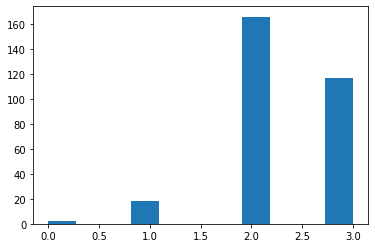


===histogram of target===
min	 0
25%	 0.0
75%	 1.0
iqr	 1.0
max	 1
range	 1
width	 0.29777103662286136
# bins	 4


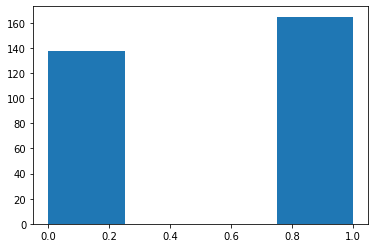

In [ ]:
# loop through the features (all numerical)
for column in df.columns:
    # find the range
    min_val = df[column].min()
    max_val = df[column].max()
    range_val = max_val - min_val
    # find the interquartile range
    p25, p75 = (df[column].quantile(q=q) for q in (0.25, 0.75))
    iqr = p75 - p25
    # calculate the bin width
    # using Freedman–Diaconis' choice
    n = df[column].shape[0]
    width = (2 * iqr * (n**(-1/3)))
    # calculate the number of bins
    # if ZERO IQR, use 2 bins
    if (iqr):
        n_bins = math.ceil(range_val/width)
    else:
        n_bins = 2
        # update the bin width
        width = range_val/n_bins
    # end if (iqr)
    
    # print the parameters we calculated
    print(fr"===histogram of {column}===")
    print('min\t', min_val)
    print('25%\t', p25)
    print('75%\t', p75)
    print('iqr\t', iqr)
    print('max\t', max_val)
    print('range\t', range_val)
    print('width\t', width)
    print('# bins\t', n_bins)

    # plot for this feature
    plt.hist(df[column].values, n_bins)
    # place the plot here
    plt.show()
    print()
# next column

This time,
we had to deal with an $I\!Q\!R = 0$.
In that case,
I assumed
$k := 2$ bins and
bin width $h \approx: \frac{\max\{X\} - \min\{X\}}k$.

We can see that
* `[0]` age, `[3]` resting BPS, `[4]` cholesterol,
  `[5]` fasting blood sugar, `[7]` maximum `thal` achieved,
  `[9]` `oldpeak`, `[11]` number of major vessel, and [12] `thal`.
  are long-tail distributions.
* `[1]` sex, `[2]` chest pain, `[6]` resting ECG,
  `[8]` exercise-induced angina, `[10]` slope of peak, and the label
  `[13]` `target` are non-long tail distributions.

In [ ]:
cols = df.columns
# all numerical columns
i_cols = set(range(cols.shape[0]))

# We can see that:
# * `[1]` sex, `[2]` chest pain, `[6]` resting ECG,
#   `[8]` exercise-induced angina, `[10]` slope of peak, and the label
#   `[13]` `target` are non-long tail distributions.
i_longtails = [1, 2, 6, 8, 10, 13]
# * `[0]` age, `[3]` resting BPS, `[4]` cholesterol,
#   `[5]` fasting blood sugar, `[7]` maximum `thal` achieved,
#   `[9]` `oldpeak`, `[11]` number of major vessel, and [12] `thal`.
i_non_longtails = list(i_cols - set(i_longtails))

# split the long tail distributions and non-long tail distributions
df_longtail_cols = cols[list(i_longtails)]
df_non_longtail_cols = cols[i_non_longtails]

# print the distribution by type
print(r'===columns by distribution===')
print(r"long tails: {}".format(df_longtail_cols))
print(r"non-long tails: {}".format(df_non_longtail_cols))

# replace missing long tails with medians
for column in df_longtail_cols:
    median = df[column].median()
    df[column] = df[column].fillna(median)
# next lt_column in df_longtail_cols

# for missing non-long tails, replace with mean
for column in df_non_longtail_cols:
    mean = df[column].mean()
    df[column] = df[column].fillna(mean)
# next column in df_non_longtail_cols

# confirm that there are no missing values
print(r'===Any still missing?===')
print(df.isna().sum() != 0)

===columns by distribution===
long tails: Index(['sex', 'cp', 'restecg', 'exang', 'slope', 'target'], dtype='object')
non-long tails: Index(['age', 'trestbps', 'chol', 'fbs', 'thalach', 'oldpeak', 'ca', 'thal'], dtype='object')
===Any still missing?===
age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool


We check the correlations of each pair of features to find redundant features that can be eliminited.

In [ ]:
# calculate the correlation matrix
hcorr = df.corr()
# display using gradients
hcorr.style.background_gradient()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [ ]:
print(r"max{{r^2}} = {}".format((-0.577537)**2))

max{r^2} = 0.333548986369


There is no strong correlation between any pair of features.
(The highest $r^2 = (-0.577537)^2 = 0.333548986369$ between `oldpeak` and the slope of peak.)

To see if target will be balanced, let us view it more clearly using the bar plot.

target
1    165
0    138
Name: target, dtype: int64
rate of difference = 0.1782178217821782


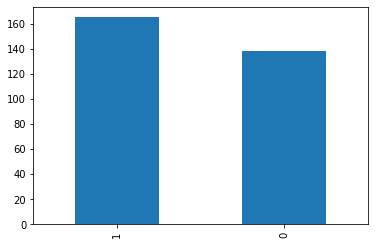

In [ ]:
# find the label and its label counts
label = df.columns[-1]
label_counts = df[label].value_counts()
r_diff = 2*abs(label_counts[0] - label_counts[1])/(label_counts[0] + label_counts[1])

# print and bar plot of the label
print(label)
print(label_counts)
print(r"rate of difference = {}".format(r_diff))
label_counts.plot(kind=r'bar')
plt.show()

The relative rate of difference is about $17.8\,\%$, which is significant. Thus, the data is somewhat imbalanced.

Let's split the post processed data.

In [ ]:
# split X, y after post processing
y = df[label].values                    # label vector
Xdf = df.drop(label, axis=1)            # feature dataframe

### 2.2 Partition the dataset with $K$-means and compute its NMI


( 0, 1)( 2, 1)( 3, 1)( 4, 1)( 5, 1)( 6, 1)( 7, 1)( 8, 1)( 9, 1)(10, 1)(11, 1)(12, 1)
( 0,12)( 2,12)( 3,12)( 4,12)( 5,12)( 6,12)( 7,12)( 8,12)( 9,12)(10,12)(11,12)
( 0,11)( 2,11)( 3,11)( 4,11)( 5,11)( 6,11)( 7,11)( 8,11)( 9,11)(10,11)
( 0,10)( 2,10)( 3,10)( 4,10)( 5,10)( 6,10)( 7,10)( 8,10)( 9,10)
( 0, 9)( 2, 9)( 3, 9)( 4, 9)( 5, 9)( 6, 9)( 7, 9)( 8, 9)
( 0, 8)( 2, 8)( 3, 8)( 4, 8)( 5, 8)( 6, 8)( 7, 8)
( 0, 7)( 2, 7)( 3, 7)( 4, 7)( 5, 7)( 6, 7)
( 0, 6)( 2, 6)( 3, 6)( 4, 6)( 5, 6)
( 0, 5)( 2, 5)( 3, 5)( 4, 5)
( 0, 4)( 2, 4)( 3, 4)
( 0, 3)( 2, 3)
( 0, 2)


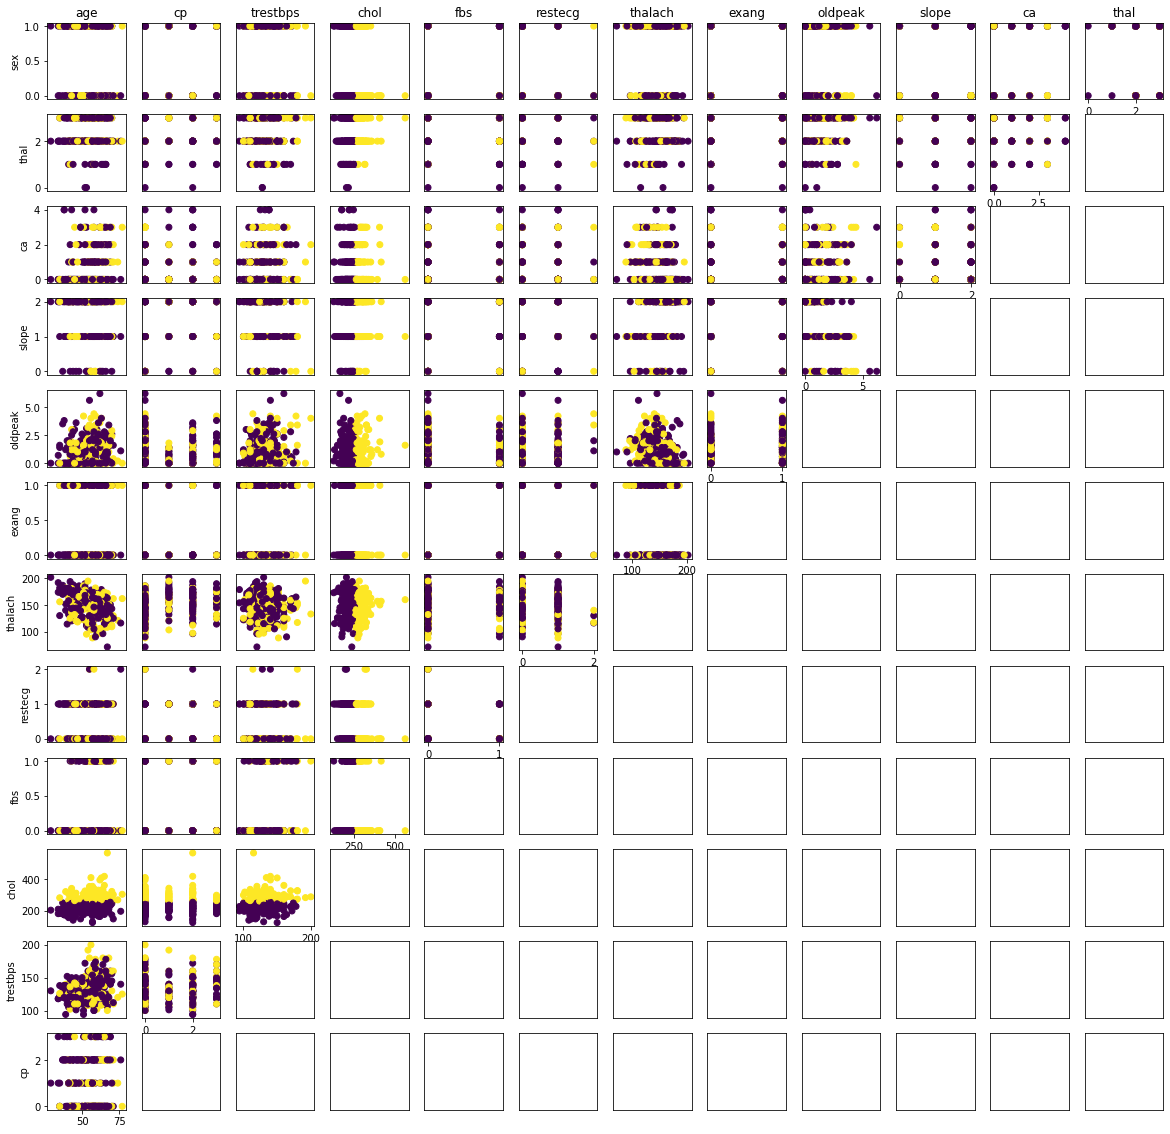

[[5.30621762e+01 7.40932642e-01 1.05181347e+00 1.29746114e+02
  2.16259067e+02 1.55440415e-01 5.75129534e-01 1.51818653e+02
  2.84974093e-01 9.73575130e-01 1.40932642e+00 6.68393782e-01
  2.25906736e+00]
 [5.66545455e+01 5.81818182e-01 8.18181818e-01 1.34918182e+02
  2.98909091e+02 1.36363636e-01 4.45454545e-01 1.45836364e+02
  4.00000000e-01 1.15545455e+00 1.38181818e+00 8.36363636e-01
  2.40909091e+00]]


In [ ]:
# train the K-means model
# first find number of clusters
yset = np.unique(y)
cluster = KMeans(n_clusters=len(yset), random_state=SEED).fit(Xdf)

# find the centroids
centroids = cluster.cluster_centers_

# visualize the partitioned dataset
tablePlot(N_FEATS, Xdf, cluster.labels_)
plt.show()
print(centroids)

### 2.3 Partition the dataset with Agglomerative method and compute its NMI


In [ ]:
# your code